In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Mini_hackathon')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
train

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,5/22/2023,57mm,freezers available,outstation,outlet_code_3254,95
1,5/29/2023,8mm,freezers available,outstation,outlet_code_1859,107
2,5/8/2023,170.57mm,freezers available,outstation,outlet_code_4176,83
3,5/22/2023,37mm,freezers available,outstation,outlet_code_1459,106
4,3/27/2023,7mm,freezers available,outstation,outlet_code_38,43
...,...,...,...,...,...,...
113395,4/24/2023,61mm,freezers available,western,outlet_code_2946,27
113396,2/20/2023,10mm,freezers available,western,outlet_code_3671,36
113397,6/5/2023,98.28mm,freezers available,western,outlet_code_3671,76
113398,6/5/2023,120.46mm,freezers available,western,outlet_code_2618,76


In [ ]:
test = pd.read_csv('test.csv')
test

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity
0,7/10/2023,144.6mm,freezers available,outstation,outlet_code_1,NaN
1,7/10/2023,114.6mm,freezers available,western,outlet_code_10,NaN
2,7/10/2023,135.48mm,freezers available,western,outlet_code_100,NaN
3,7/10/2023,135.53mm,no freezers available,outstation,outlet_code_1000,NaN
4,7/10/2023,167.37mm,no freezers available,outstation,outlet_code_1001,NaN
...,...,...,...,...,...,...
4195,7/10/2023,82.37mm,freezers available,western,outlet_code_995,NaN
4196,7/10/2023,111.45mm,freezers available,western,outlet_code_996,NaN
4197,7/10/2023,159.72mm,freezers available,outstation,outlet_code_997,NaN
4198,7/10/2023,155.37mm,freezers available,outstation,outlet_code_998,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

df = test.copy()  # Create a copy of the original DataFrame to avoid modifying it

In [ ]:
df['expected_rainfall'] = pd.to_numeric(df['expected_rainfall'].str.rstrip('mm'), errors='coerce')

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


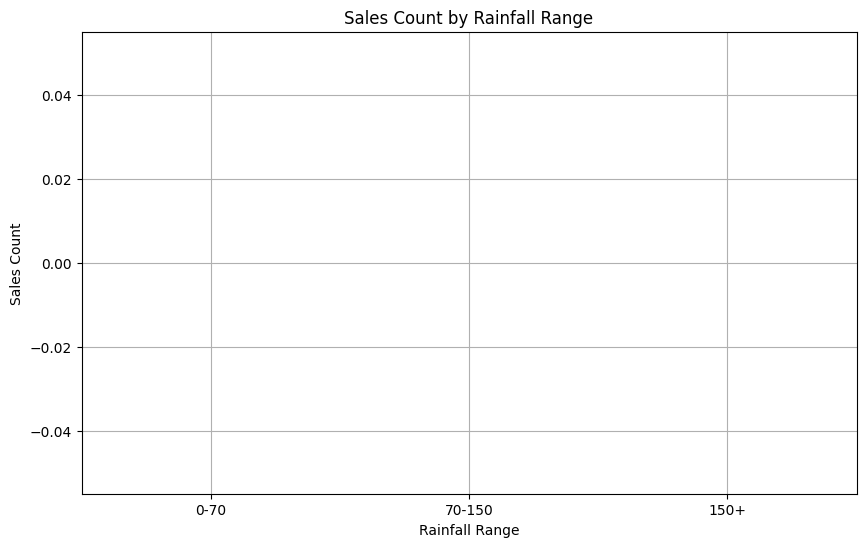

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define rainfall bins
bins = [0, 70, 150, float('inf')]  # Adjust the bin edges as needed
labels = ['0-70', '70-150', '150+']  # Adjust the labels as needed

# Create a new column 'rainfall_range' with the corresponding labels
df['rainfall_range'] = pd.cut(df['expected_rainfall'], bins=bins, labels=labels, right=False)

# Plot a bar chart to visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='rainfall_range', y='sales_quantity', data=df, order=labels)
plt.title('Sales Count by Rainfall Range')
plt.xlabel('Rainfall Range')
plt.ylabel('Sales Count')
plt.grid(True)
plt.show()

In [ ]:
df

,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,rainfall_range
0,7/10/2023,144.60,freezers available,outstation,outlet_code_1,NaN,70-150
1,7/10/2023,114.60,freezers available,western,outlet_code_10,NaN,70-150
2,7/10/2023,135.48,freezers available,western,outlet_code_100,NaN,70-150
3,7/10/2023,135.53,no freezers available,outstation,outlet_code_1000,NaN,70-150
4,7/10/2023,167.37,no freezers available,outstation,outlet_code_1001,NaN,150+
...,...,...,...,...,...,...,...
4195,7/10/2023,82.37,freezers available,western,outlet_code_995,NaN,70-150
4196,7/10/2023,111.45,freezers available,western,outlet_code_996,NaN,70-150
4197,7/10/2023,159.72,freezers available,outstation,outlet_code_997,NaN,150+
4198,7/10/2023,155.37,freezers available,outstation,outlet_code_998,NaN,150+


In [ ]:
unique_freezer_statuses = df['freezer_status'].unique()

# Print the unique values
print("Unique Freezer Statuses:", unique_freezer_statuses)

# Print the count of unique values
print("Number of Unique Freezer Statuses:", len(unique_freezer_statuses))

Unique Freezer Statuses: [' freezers available ' '   freezers available ' ' no freezers available '
 '  freezers available ']
Number of Unique Freezer Statuses: 4


In [ ]:
# Remove leading and trailing spaces from the 'freezer_status' column
df['freezer_status'] = df['freezer_status'].str.strip()

# Count occurrences of each unique value in the cleaned 'freezer_status' column
freezer_status_counts = df['freezer_status'].value_counts()

# Print the counts
print("Freezer Status Counts:")
print(freezer_status_counts)

# Get unique values after removing spaces
unique_freezer_statuses = df['freezer_status'].unique()

# Print the unique values
print("Unique Freezer Statuses:", unique_freezer_statuses)

Freezer Status Counts:
freezers available       3185
no freezers available    1015
Name: freezer_status, dtype: int64
Unique Freezer Statuses: ['freezers available' 'no freezers available']


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'freezer_status' column
label_encoder = LabelEncoder()
df['freezer_status_encoded'] = label_encoder.fit_transform(df['freezer_status'])

# Create binary columns for each unique value in the 'freezer_status' column
df_encoded = pd.get_dummies(df, columns=['freezer_status_encoded'], prefix='freezer_status')

# Print the cleaned and encoded DataFrame
print("Cleaned and Encoded DataFrame:")
df_encoded

Cleaned and Encoded DataFrame:


,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,rainfall_range,freezer_status_0,freezer_status_1
0,7/10/2023,144.60,freezers available,outstation,outlet_code_1,NaN,70-150,1,0
1,7/10/2023,114.60,freezers available,western,outlet_code_10,NaN,70-150,1,0
2,7/10/2023,135.48,freezers available,western,outlet_code_100,NaN,70-150,1,0
3,7/10/2023,135.53,no freezers available,outstation,outlet_code_1000,NaN,70-150,0,1
4,7/10/2023,167.37,no freezers available,outstation,outlet_code_1001,NaN,150+,0,1
...,...,...,...,...,...,...,...,...,...
4195,7/10/2023,82.37,freezers available,western,outlet_code_995,NaN,70-150,1,0
4196,7/10/2023,111.45,freezers available,western,outlet_code_996,NaN,70-150,1,0
4197,7/10/2023,159.72,freezers available,outstation,outlet_code_997,NaN,150+,1,0
4198,7/10/2023,155.37,freezers available,outstation,outlet_code_998,NaN,150+,1,0


In [ ]:
df_encoded = pd.get_dummies(df_encoded, columns=['rainfall_range'], prefix='rainfall_range')

# Print or display the DataFrame with the one-hot encoded 'rainfall_range' column
print("DataFrame with One-Hot Encoded 'rainfall_range' column:")
df_encoded

DataFrame with One-Hot Encoded 'rainfall_range' column:


,week_start_date,expected_rainfall,freezer_status,outlet_region,outlet_code,sales_quantity,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+
0,7/10/2023,144.60,freezers available,outstation,outlet_code_1,NaN,1,0,0,1,0
1,7/10/2023,114.60,freezers available,western,outlet_code_10,NaN,1,0,0,1,0
2,7/10/2023,135.48,freezers available,western,outlet_code_100,NaN,1,0,0,1,0
3,7/10/2023,135.53,no freezers available,outstation,outlet_code_1000,NaN,0,1,0,1,0
4,7/10/2023,167.37,no freezers available,outstation,outlet_code_1001,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4195,7/10/2023,82.37,freezers available,western,outlet_code_995,NaN,1,0,0,1,0
4196,7/10/2023,111.45,freezers available,western,outlet_code_996,NaN,1,0,0,1,0
4197,7/10/2023,159.72,freezers available,outstation,outlet_code_997,NaN,1,0,0,0,1
4198,7/10/2023,155.37,freezers available,outstation,outlet_code_998,NaN,1,0,0,0,1


In [ ]:
unique_outlet_regions = df_encoded['outlet_region'].unique()

# Print the unique values
print("Unique Outlet Regions:", unique_outlet_regions)

Unique Outlet Regions: ['outstation' 'western' 'upcountry']


In [ ]:
import pandas as pd

# Assuming df1 is your DataFrame
df_encoded = pd.get_dummies(df_encoded, columns=['outlet_region'], prefix='outlet_region')

# Print or display the DataFrame with the one-hot encoded 'outlet_region' column
print("DataFrame with One-Hot Encoded 'outlet_region' column:")
df_encoded

DataFrame with One-Hot Encoded 'outlet_region' column:


,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western
0,7/10/2023,144.60,freezers available,outlet_code_1,NaN,1,0,0,1,0,1,0,0
1,7/10/2023,114.60,freezers available,outlet_code_10,NaN,1,0,0,1,0,0,0,1
2,7/10/2023,135.48,freezers available,outlet_code_100,NaN,1,0,0,1,0,0,0,1
3,7/10/2023,135.53,no freezers available,outlet_code_1000,NaN,0,1,0,1,0,1,0,0
4,7/10/2023,167.37,no freezers available,outlet_code_1001,NaN,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,7/10/2023,82.37,freezers available,outlet_code_995,NaN,1,0,0,1,0,0,0,1
4196,7/10/2023,111.45,freezers available,outlet_code_996,NaN,1,0,0,1,0,0,0,1
4197,7/10/2023,159.72,freezers available,outlet_code_997,NaN,1,0,0,0,1,1,0,0
4198,7/10/2023,155.37,freezers available,outlet_code_998,NaN,1,0,0,0,1,1,0,0


In [ ]:
df_encoded['week_start_date'] = pd.to_datetime(df_encoded['week_start_date'], format='%m/%d/%Y')

# Function to calculate the custom week number
def custom_week_number(date):
    first_day_of_month = date.replace(day=1)
    days_in_first_week = 7 - first_day_of_month.weekday()
    return min((date.day + days_in_first_week - 1) // 7 + 1, 5)  # Ensure that the custom week is at most 5

# Extract year, month, and custom week
df_encoded['year'] = df_encoded['week_start_date'].dt.year
df_encoded['month'] = df_encoded['week_start_date'].dt.month
df_encoded['custom_week'] = df_encoded['week_start_date'].apply(custom_week_number)

# Print or display the DataFrame with the new columns
print("DataFrame with Extracted Year, Month, and Custom Week:")
df_encoded

DataFrame with Extracted Year, Month, and Custom Week:


,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,year,month,custom_week
0,2023-07-10,144.60,freezers available,outlet_code_1,NaN,1,0,0,1,0,1,0,0,2023,7,2
1,2023-07-10,114.60,freezers available,outlet_code_10,NaN,1,0,0,1,0,0,0,1,2023,7,2
2,2023-07-10,135.48,freezers available,outlet_code_100,NaN,1,0,0,1,0,0,0,1,2023,7,2
3,2023-07-10,135.53,no freezers available,outlet_code_1000,NaN,0,1,0,1,0,1,0,0,2023,7,2
4,2023-07-10,167.37,no freezers available,outlet_code_1001,NaN,0,1,0,0,1,1,0,0,2023,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,2023-07-10,82.37,freezers available,outlet_code_995,NaN,1,0,0,1,0,0,0,1,2023,7,2
4196,2023-07-10,111.45,freezers available,outlet_code_996,NaN,1,0,0,1,0,0,0,1,2023,7,2
4197,2023-07-10,159.72,freezers available,outlet_code_997,NaN,1,0,0,0,1,1,0,0,2023,7,2
4198,2023-07-10,155.37,freezers available,outlet_code_998,NaN,1,0,0,0,1,1,0,0,2023,7,2


In [ ]:
# Get unique values for the 'year' column
unique_years = df_encoded['year'].unique()
print("Unique Years:", unique_years)

# Get unique values for the 'month' column
unique_months = df_encoded['month'].unique()
print("Unique Months:", unique_months)

# Get unique values for the 'custom_week' column
unique_custom_weeks = df_encoded['custom_week'].unique()
print("Unique Custom Weeks:", unique_custom_weeks)

Unique Years: [2023]
Unique Months: [7]
Unique Custom Weeks: [2]


In [ ]:
# Drop the 'year' column from the DataFrame
df_encoded = df_encoded.drop(columns=['year'])
df_encoded

,week_start_date,expected_rainfall,freezer_status,outlet_code,sales_quantity,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,month,custom_week
0,2023-07-10,144.60,freezers available,outlet_code_1,NaN,1,0,0,1,0,1,0,0,7,2
1,2023-07-10,114.60,freezers available,outlet_code_10,NaN,1,0,0,1,0,0,0,1,7,2
2,2023-07-10,135.48,freezers available,outlet_code_100,NaN,1,0,0,1,0,0,0,1,7,2
3,2023-07-10,135.53,no freezers available,outlet_code_1000,NaN,0,1,0,1,0,1,0,0,7,2
4,2023-07-10,167.37,no freezers available,outlet_code_1001,NaN,0,1,0,0,1,1,0,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,2023-07-10,82.37,freezers available,outlet_code_995,NaN,1,0,0,1,0,0,0,1,7,2
4196,2023-07-10,111.45,freezers available,outlet_code_996,NaN,1,0,0,1,0,0,0,1,7,2
4197,2023-07-10,159.72,freezers available,outlet_code_997,NaN,1,0,0,0,1,1,0,0,7,2
4198,2023-07-10,155.37,freezers available,outlet_code_998,NaN,1,0,0,0,1,1,0,0,7,2


In [ ]:
sales_quantity_column = df_encoded.pop('sales_quantity')  # Remove the column
df_encoded['sales_quantity'] = sales_quantity_column  # Add the column back at the end

# Print or display the updated DataFrame
print("DataFrame with 'sales_quantity' moved to the last column:")
df_encoded

DataFrame with 'sales_quantity' moved to the last column:


,week_start_date,expected_rainfall,freezer_status,outlet_code,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,month,custom_week,sales_quantity
0,2023-07-10,144.60,freezers available,outlet_code_1,1,0,0,1,0,1,0,0,7,2,NaN
1,2023-07-10,114.60,freezers available,outlet_code_10,1,0,0,1,0,0,0,1,7,2,NaN
2,2023-07-10,135.48,freezers available,outlet_code_100,1,0,0,1,0,0,0,1,7,2,NaN
3,2023-07-10,135.53,no freezers available,outlet_code_1000,0,1,0,1,0,1,0,0,7,2,NaN
4,2023-07-10,167.37,no freezers available,outlet_code_1001,0,1,0,0,1,1,0,0,7,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,2023-07-10,82.37,freezers available,outlet_code_995,1,0,0,1,0,0,0,1,7,2,NaN
4196,2023-07-10,111.45,freezers available,outlet_code_996,1,0,0,1,0,0,0,1,7,2,NaN
4197,2023-07-10,159.72,freezers available,outlet_code_997,1,0,0,0,1,1,0,0,7,2,NaN
4198,2023-07-10,155.37,freezers available,outlet_code_998,1,0,0,0,1,1,0,0,7,2,NaN


In [ ]:
df_new = df_encoded.drop(["week_start_date","expected_rainfall","freezer_status"],axis=1)

In [ ]:
df_new

,outlet_code,freezer_status_0,freezer_status_1,rainfall_range_0-70,rainfall_range_70-150,rainfall_range_150+,outlet_region_outstation,outlet_region_upcountry,outlet_region_western,month,custom_week,sales_quantity
0,outlet_code_1,1,0,0,1,0,1,0,0,7,2,NaN
1,outlet_code_10,1,0,0,1,0,0,0,1,7,2,NaN
2,outlet_code_100,1,0,0,1,0,0,0,1,7,2,NaN
3,outlet_code_1000,0,1,0,1,0,1,0,0,7,2,NaN
4,outlet_code_1001,0,1,0,0,1,1,0,0,7,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4195,outlet_code_995,1,0,0,1,0,0,0,1,7,2,NaN
4196,outlet_code_996,1,0,0,1,0,0,0,1,7,2,NaN
4197,outlet_code_997,1,0,0,0,1,1,0,0,7,2,NaN
4198,outlet_code_998,1,0,0,0,1,1,0,0,7,2,NaN


In [ ]:
file_path = '/content/drive/MyDrive/Mini_hackathon/pre_processed_test.csv'
df_new.to_csv(file_path, index=False)